## To submit this assignment, please solve the following problem. Then, save your notebook with the format [YOUR_NAME_HERE]\_DataViz_Homework and submit via NYU Classes. 

---

### For this assignment you must:

1. Read in the NYC Accidents CSV and create a new 'DATETIME' column, as done in class;
2. Plot a random selection of 10000 accidents that take place in Brooklyn;
3. Plot the number of pedestrians injured between Jan 1, 2018 and March 1, 2018; 
4. Use a pivot table to find the average number of pedestrians injured per datetime for each borough, 
5. And plot the data as a timeseries between Jan. 1, 2019 and Jan. 8, 2019. 

## 1. Read in the NYC Accidents CSV and create new 'DATETIME' column

In [2]:
import pandas as pd

data=pd.read_csv("NYPD_Crashes.csv")

#Create DATETIME Column
data['DATETIME'] = data.DATE + ' ' + data.TIME
data['DATETIME']=pd.to_datetime(data['DATETIME'],format='%m/%d/%Y %H:%M')
data.tail()

# your code here

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATETIME
1569420,02/07/2013,7:40,BROOKLYN,11221,40.690031,-73.930471,POINT (-73.9304708 40.690031),REID AVENUE,LEXINGTON AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,183270,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2013-02-07 07:40:00
1569421,02/10/2013,23:50,QUEENS,11423,40.709672,-73.774030,POINT (-73.77403 40.7096722),185 STREET,JAMAICA AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,210198,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN,2013-02-10 23:50:00
1569422,02/09/2013,22:10,NaN,NaN,NaN,NaN,NaN,MT EDEN PARKWAY,GRAND CONCOURSE,NaN,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Fatigued/Drowsy,NaN,NaN,NaN,86381,LIVERY VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2013-02-09 22:10:00
1569423,02/08/2013,17:30,NaN,NaN,NaN,NaN,NaN,DECKER AVENUE,CORNELL STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,287086,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2013-02-08 17:30:00
1569424,02/10/2013,21:00,BRONX,10456,40.818724,-73.903496,POINT (-73.9034962 40.8187237),WESTCHESTER AVENUE,UNION AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,73829,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2013-02-10 21:00:00


## 2. Plot a random selection of 10,000 accidents in Brooklyn

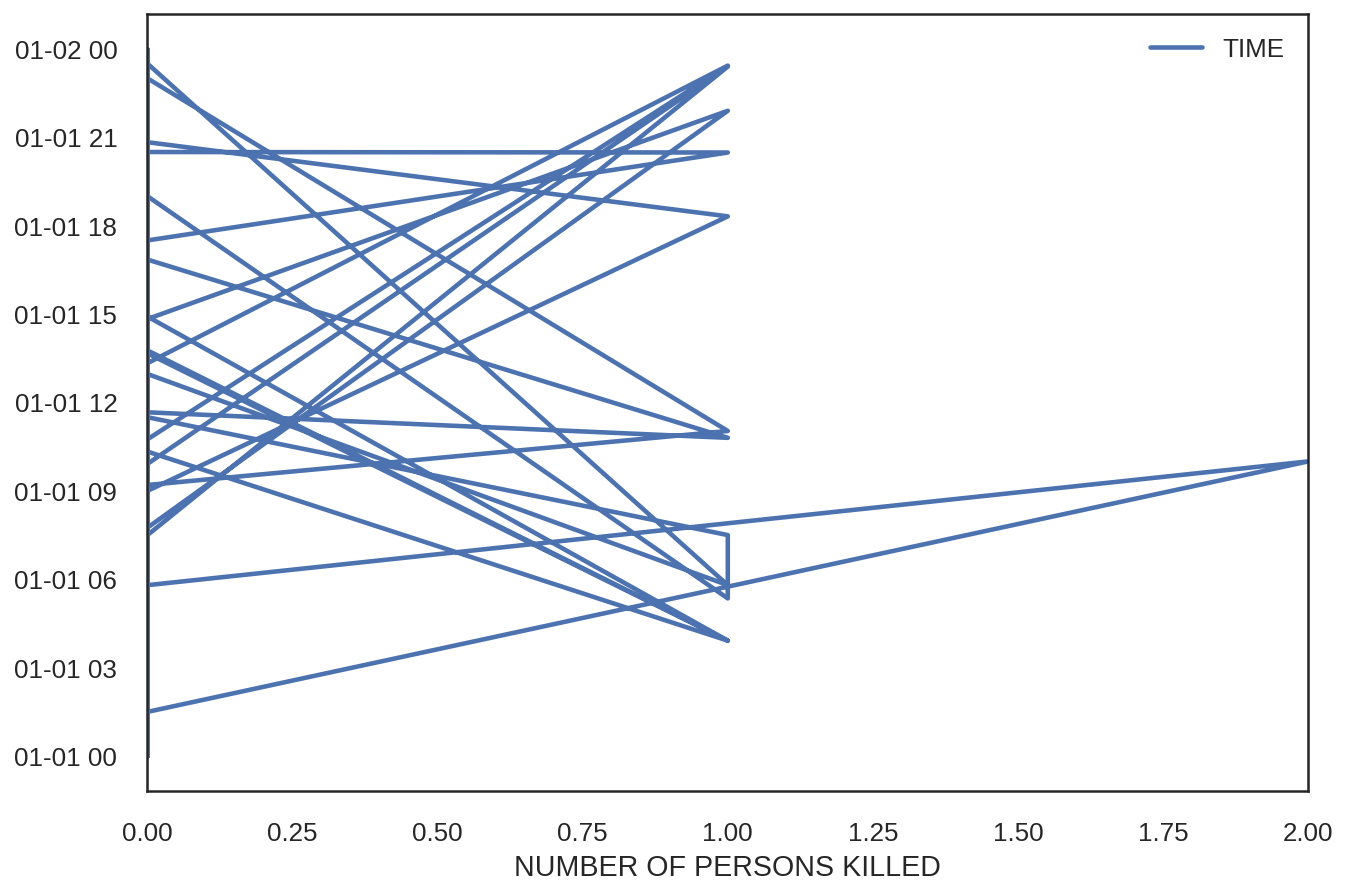

In [36]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (20, 20)})
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks'])


data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M')
brooklyn_data=data.loc[data.BOROUGH=='BROOKLYN']
brooklyn_data.sample(n=10000).plot(kind='line',x='NUMBER OF PERSONS KILLED',y='TIME')
plt.show()
# your code here

## 3. Plot the sum of pedestrians injured between Jan. 1, 2018 and Mar. 1, 2018

In [50]:
data['DATE']=pd.to_datetime(data['DATE'],format='%m/%d/%Y')# your code here to create the pivot table
cleanset=(data.DATE>'01/01/2018')&(data.DATE<'03/01/2018')
jan_march_data=data[cleanset]
jan_march_data.tail(100)

data_timeseries=jan_march_data.pivot_table(
    index='DATE',
    values='NUMBER OF PERSONS INJURED',
    aggfunc='sum'            
)

data_timeseries.head()

,NUMBER OF PERSONS INJURED
DATE,
2018-01-02,160.0
2018-01-03,154.0
2018-01-04,60.0
2018-01-05,115.0
2018-01-06,128.0


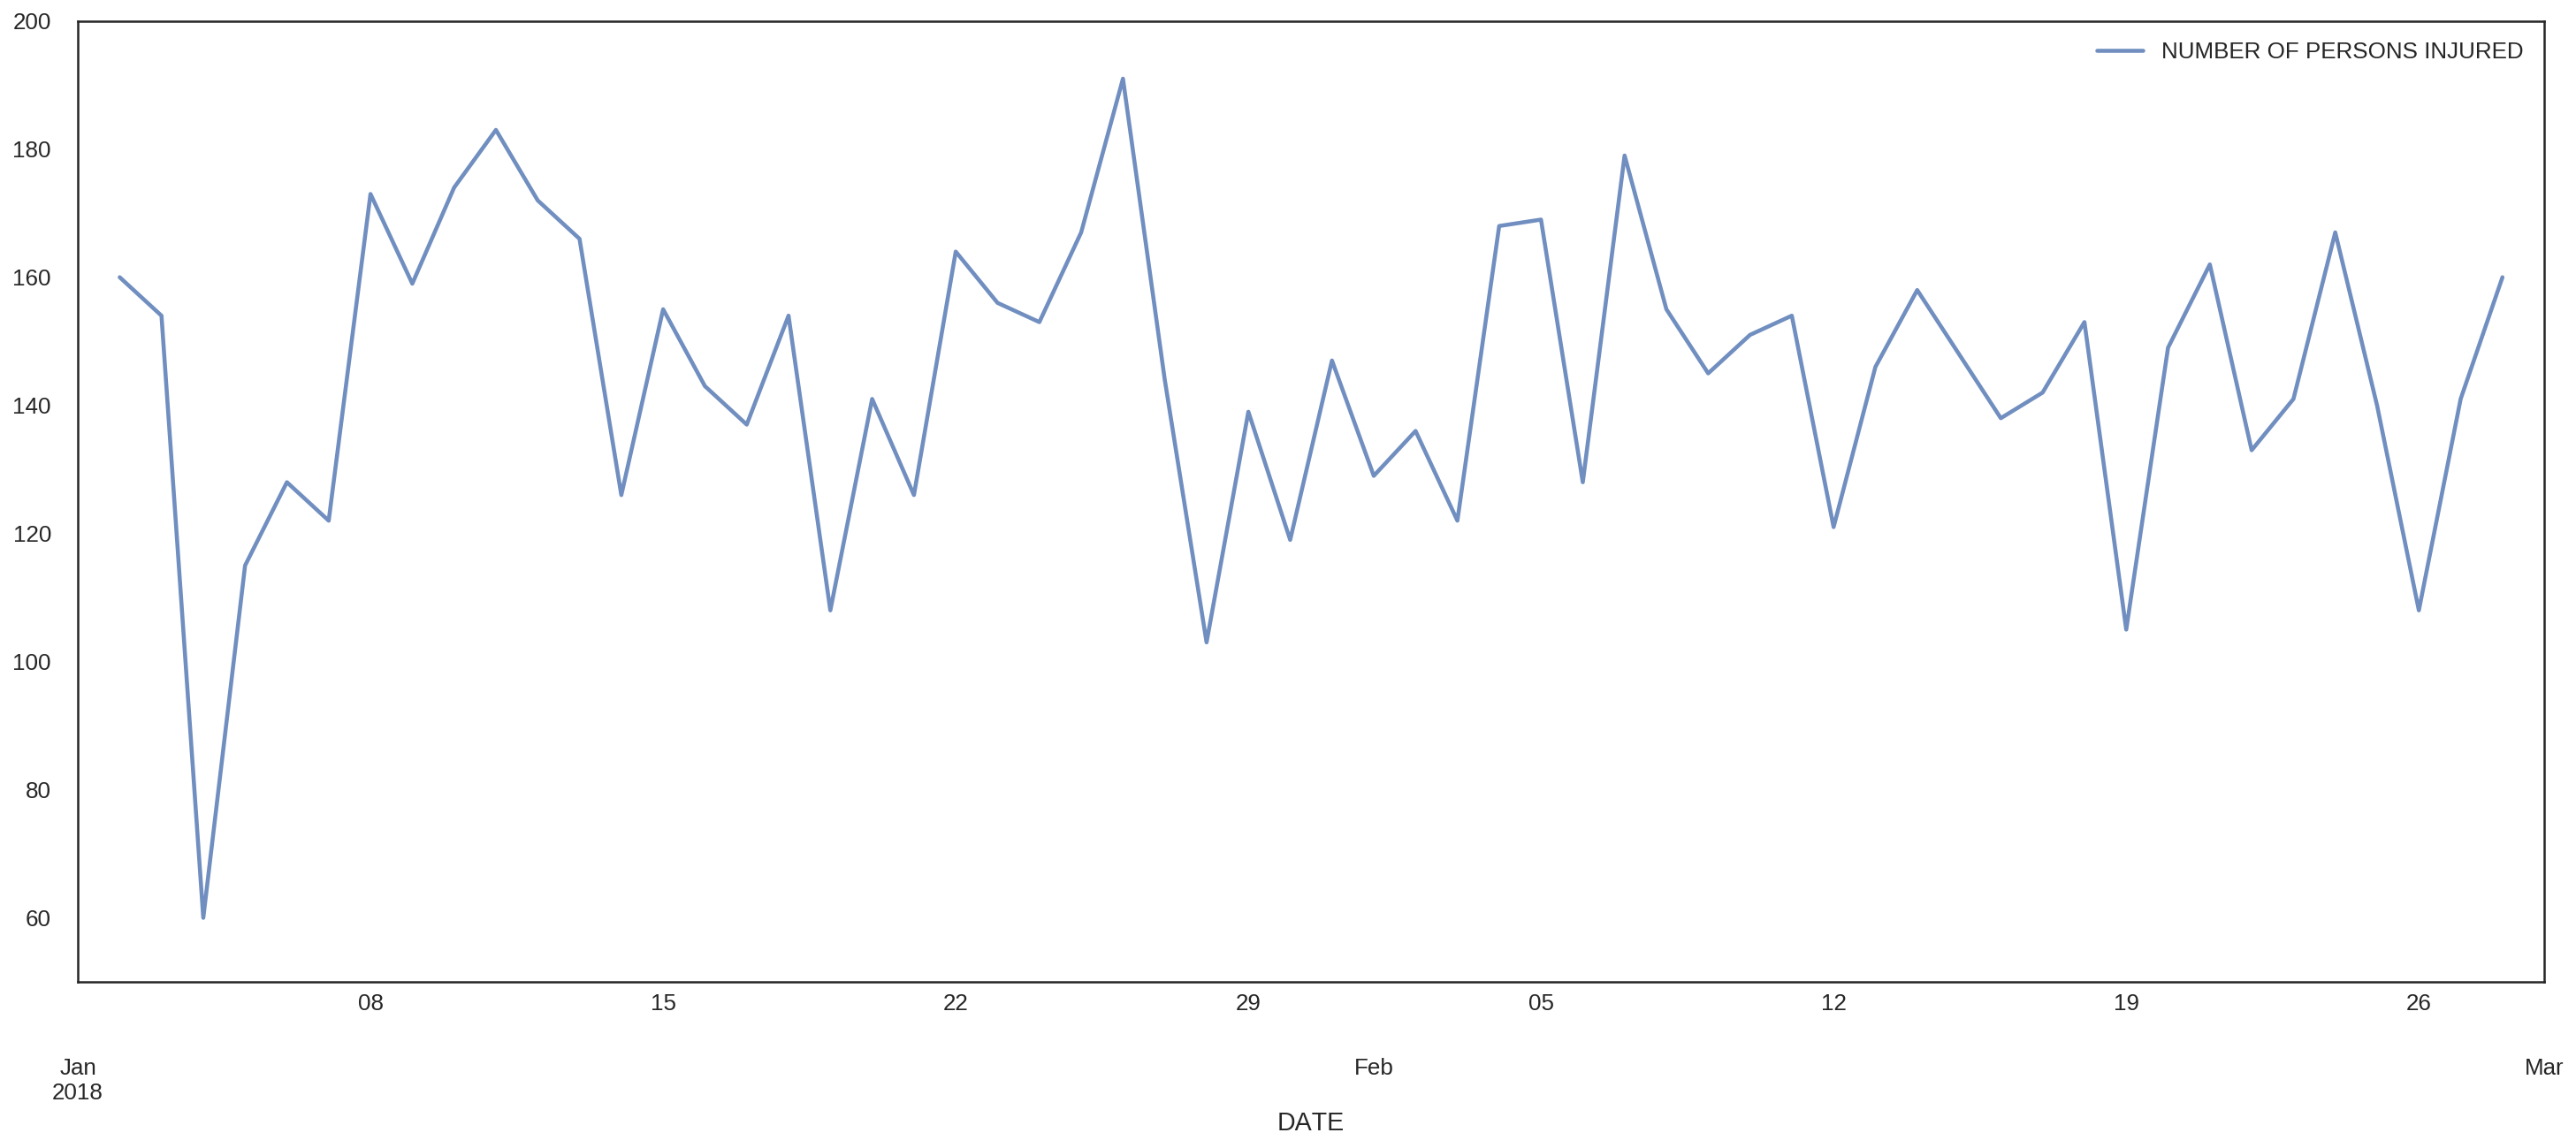

In [61]:
# your code here to plot the timeseries
data_timeseries.plot(alpha=.8, figsize=(25, 10),ylim=(50,200), xlim=('2018-01-01', '2018-03-01'))

## 4. Use a pivot table to find the average number of pedestrians injured per datetime for each borough...

In [87]:
# your code here

timeseries2=data.pivot_table(
    index='DATE',
    columns='BOROUGH',
    values='NUMBER OF PERSONS INJURED',
    aggfunc='mean'
    
)
timeseries2.head()

BOROUGH,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
DATE,,,,,
2012-07-01,0.282051,0.348148,0.302521,0.257426,0.307692
2012-07-02,0.239437,0.385714,0.168142,0.372340,0.240000
2012-07-03,0.424658,0.377246,0.166667,0.338235,0.090909
2012-07-04,0.470588,0.393617,0.230769,0.322581,0.181818
2012-07-05,0.200000,0.313725,0.130841,0.260163,0.166667


## 5. ...and plot the data as a timeseries between Jan. 1, 2019 and Jan. 8, 2019. 

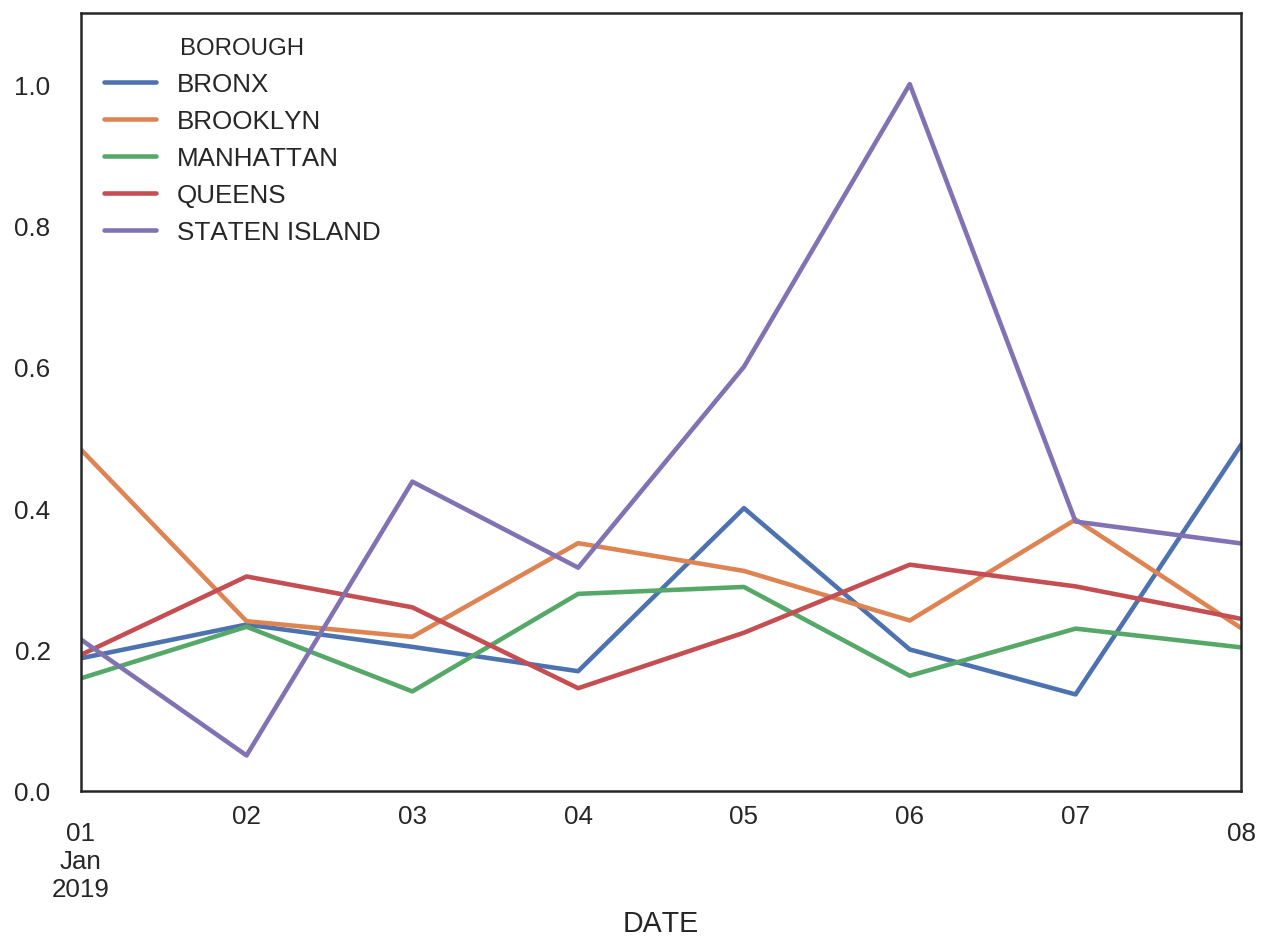

In [88]:
# your code here
timeseries2.plot(ylim=(0,1.1),xlim=('2019-01-01', '2019-01-08'))